In [1185]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow  as tf
from sklearn.model_selection  import train_test_split  
from tensorflow.keras import models, layers, optimizers, utils

In [1186]:
creditcard = pd.read_csv("creditcard.csv") 
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [1187]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [1188]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [1189]:
creditcard.Time.value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
2088.0       1
64100.0      1
42068.0      1
119630.0     1
140344.0     1
Name: Time, Length: 124592, dtype: int64

In [1190]:
creditcard.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

# check the empty values

In [1191]:
np.where(creditcard.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [1192]:
(creditcard['Amount'].values == 0).sum()

1825

# Balancing the data

In [1193]:
non_fraud = creditcard[creditcard["Class"]==0]
fraud = creditcard[creditcard["Class"]==1]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [1194]:
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [1195]:
data = fraud.append(non_fraud, ignore_index=True)
data.shape
data["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [1196]:
x_data= data.drop(columns="Class", axis=0)
label = data["Class"]

In [1197]:
non_fraud.shape

(492, 31)

In [1198]:
data.shape

(984, 31)

In [1199]:
non_fraud.shape, fraud.shape

((492, 31), (492, 31))

In [1200]:
label.shape

(984,)

In [1201]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,61931.0,1.174023,-0.076475,-0.146528,0.386491,-0.047289,-0.277052,0.062677,-0.026787,-0.077653,...,0.022824,-0.099507,-0.221406,-0.476136,0.560732,0.427827,-0.062516,-0.000664,62.66,0
980,78248.0,-0.981025,0.920879,2.409865,0.564890,0.248886,-0.251573,0.649909,-0.213116,-0.357464,...,0.244274,0.850205,-0.403663,0.438585,0.370455,-0.241324,-0.337874,-0.117114,7.80,0
981,62856.0,1.296101,-0.431326,0.170823,-0.462298,-1.027757,-1.124050,-0.534421,-0.191679,-0.731779,...,0.076488,0.033328,-0.044342,0.308228,0.346689,-0.287724,0.019748,0.054282,59.91,0
982,64530.0,1.156585,0.271863,0.513677,1.538057,-0.151898,-0.158053,-0.025674,-0.008206,-0.878821,...,-0.041607,-0.234458,-0.029605,0.041503,0.253764,0.876056,-0.084289,0.002329,31.24,0


# Splitting Training and Test data

In [1202]:
train_data, test_data, train_labels, test_labels=train_test_split(x_data, label, test_size=0.3, random_state=0, stratify= label)

In [1203]:
train_data.shape, test_data.shape

((688, 30), (296, 30))

# Normalize the data

In [1204]:
mean = train_data.mean(axis = 0) 
std = train_data.std(axis = 0)
train_data = (train_data-mean)/std
test_data = (test_data-mean)/std

In [1205]:
train_labels= np.asarray(train_labels).astype(dtype="float64")
test_labels = np.asarray(test_labels).astype(dtype="float64")

# Building the model

In [1206]:
model = models.Sequential()
model.add(layers.Dense(20, activation = "relu", input_shape=(train_data.shape[1],)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation = 'relu')) 
model.add(layers.Dropout(0.3))
model.add(layers.Dense(8, activation = 'relu'))  
model.add(layers.Dropout(0.3))
model.add(layers.Dense(6, activation = 'relu' ))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [1207]:
model.compile(loss ='binary_crossentropy', optimizer = 'rmsprop', metrics= ['accuracy'])

# Training the network

In [1208]:
history = model.fit(train_data, train_labels, epochs = 100, validation_split = 0.2)

Epoch 1/100
18/18 [==============================] - 3s 39ms/step - loss: 0.6881 - accuracy: 0.5677 - val_loss: 0.6734 - val_accuracy: 0.7899
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 0.6808 - accuracy: 0.5978 - val_loss: 0.6544 - val_accuracy: 0.8043
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 0.6728 - accuracy: 0.5512 - val_loss: 0.6411 - val_accuracy: 0.8043
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6561 - accuracy: 0.6183 - val_loss: 0.6194 - val_accuracy: 0.8188
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6301 - accuracy: 0.6525 - val_loss: 0.5988 - val_accuracy: 0.8043
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 0.6416 - accuracy: 0.6079 - val_loss: 0.5791 - val_accuracy: 0.8406
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 0.6185 - accuracy: 0.6573 - val_loss: 0.5585 - val_accuracy: 0.8406
Epoch 8/100

Epoch 59/100
18/18 [==============================] - 0s 8ms/step - loss: 0.2555 - accuracy: 0.9231 - val_loss: 0.2552 - val_accuracy: 0.8986
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 0.2897 - accuracy: 0.8813 - val_loss: 0.2531 - val_accuracy: 0.8986
Epoch 61/100
18/18 [==============================] - 0s 8ms/step - loss: 0.2373 - accuracy: 0.9227 - val_loss: 0.2566 - val_accuracy: 0.8986
Epoch 62/100
18/18 [==============================] - 0s 8ms/step - loss: 0.3085 - accuracy: 0.9070 - val_loss: 0.2531 - val_accuracy: 0.8986
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 0.2558 - accuracy: 0.9317 - val_loss: 0.2517 - val_accuracy: 0.8986
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 0.2360 - accuracy: 0.9411 - val_loss: 0.2520 - val_accuracy: 0.8986
Epoch 65/100
18/18 [==============================] - 0s 8ms/step - loss: 0.2260 - accuracy: 0.9225 - val_loss: 0.2515 - val_accuracy: 0.8986
Epoch 

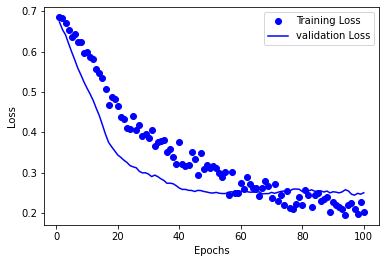

In [1209]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

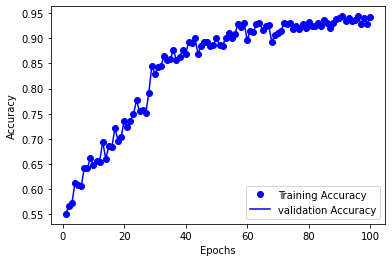

In [1210]:
acc =history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(1, len(acc)+1)
plt.plot(epochs[:], acc[:],"bo", label="Training Accuracy")
plt.plot(epochs[:], acc[:],"b", label="validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluating the Network

In [1211]:
test_loss_score, test_acc_score = model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 5ms/step - loss: 0.2266 - accuracy: 0.9223


In [1212]:
test_acc_score*100

92.22972989082336

# predicting the values

In [1213]:
 prediction = model.predict(test_data).astype(dtype='u8')

In [1216]:
prediction[:25]

array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0]], dtype=uint64)

In [1217]:
test_labels[:25]

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0.])